## Radiative Flux Variation of Pleiades Stars

This notebook reconstructs and visualizes the radiative flux variations of the seven brightest Pleiades stars (Alcyone, Atlas, Electra, Maia, Merope, Taygeta, and Pleione) using Fourier parameters from provided CSV files.

Light curves are graphs that show the brightness of an object over a period of time. In the study of objects which change their brightness over time, such as novae, supernovae, and variable stars, the light curve is a simple but valuable tool to a scientist.

The light curves are reconstructed from the figure in the paper below and contains seven subplots showing the flux variations over time for each star.

This analysis is based on the data and methodology from:
[White, T. R., Pope, B. J. S., Antoci, V., et al. (2017). "Beyond the Kepler/K2 bright limit: variability in the seven brightest members of the Pleiades." 
MNRAS, 471(3), 2882-2901. doi:10.1093/mnras/stx1050](https://academic.oup.com/mnras/article/471/3/2882/4081952?login=false)


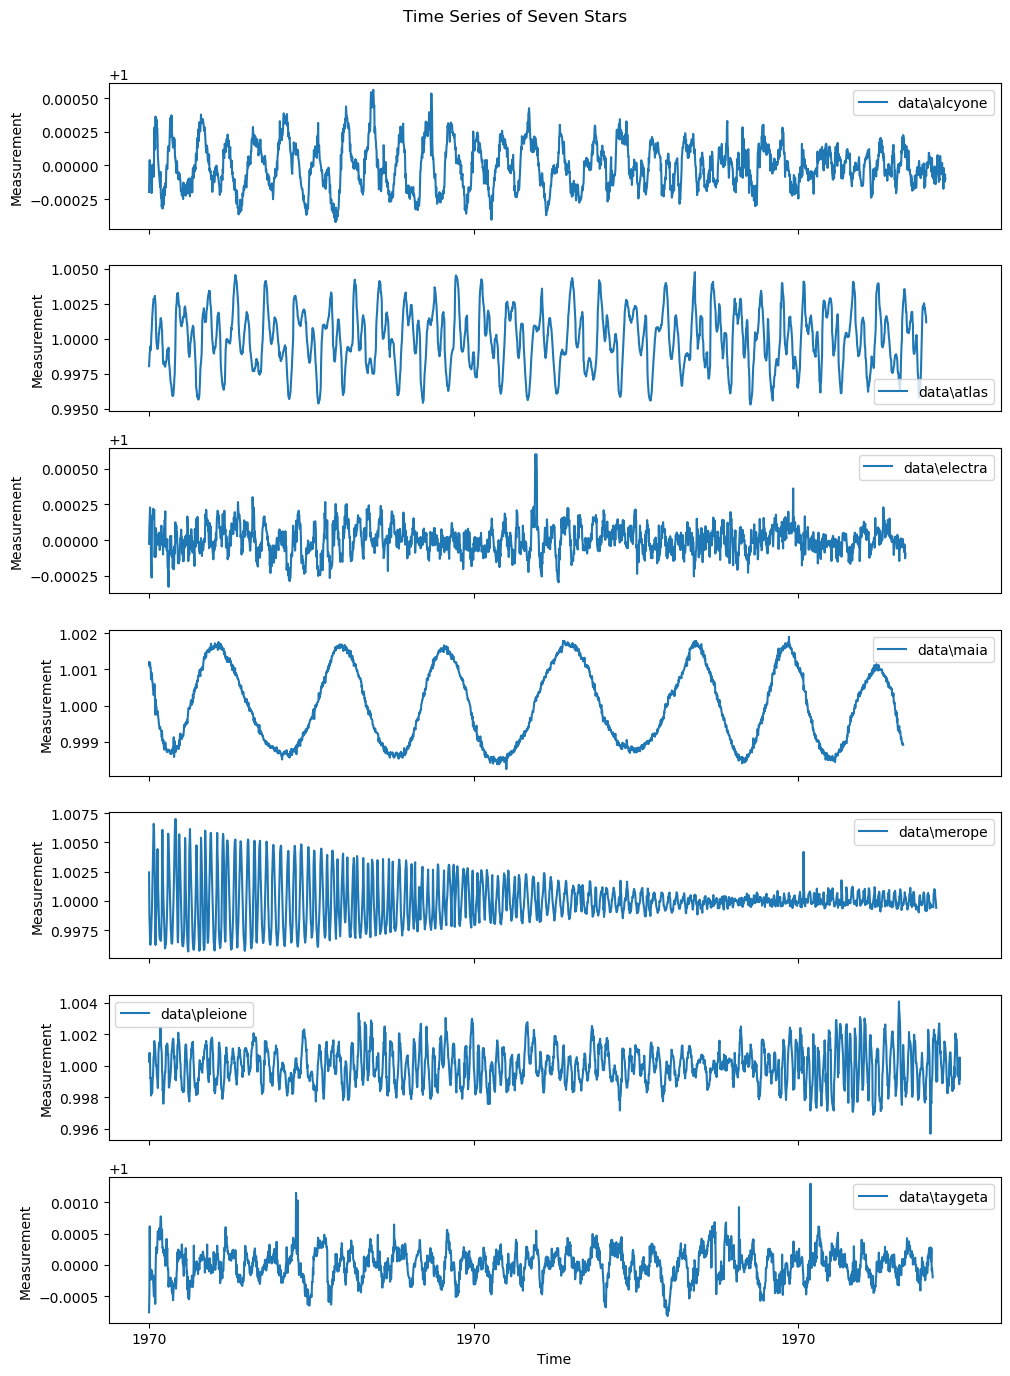

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Get a list of all CSV files matching the pattern
file_paths = glob.glob("./data/*recreated-ts.csv")  # Adjust path if necessary
file_paths.sort()  # Ensure consistent ordering

# Define figure and subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 14), sharex=True)
fig.suptitle("Time Series of Seven Stars")

# Loop through files and plot each in its respective subplot
for ax, file_path in zip(axes, file_paths):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Extract time and measurement columns
    time_col = df.columns[0]  # Assuming first column is time
    value_col = df.columns[2]  # Assuming second column is the measurement

    # Convert time column to datetime format
    df[time_col] = pd.to_datetime(df[time_col])

    # Plot the data
    ax.plot(df[time_col], df[value_col], label=file_path.split("/")[-1].replace("-recreated-ts.csv", ""))
    ax.set_ylabel("Measurement")
    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel("Time")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("light_curves_figure.png", dpi=300, bbox_inches="tight")
plt.show()
